In [276]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [277]:
tickers=["RELIANCE.NS"]

In [278]:
stock_data=yf.download(tickers,start="2012-01-01")
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,323.036774,8679938
2012-01-03,352.780975,360.037201,351.839905,358.922760,331.312103,9455771
2012-01-04,360.284851,362.043182,353.325836,354.712677,327.425934,8557084
2012-01-05,354.143066,359.071350,343.791199,346.465851,319.813477,13364666
2012-01-06,345.252350,358.600830,345.054230,355.406097,328.065979,9495456
...,...,...,...,...,...,...
2022-07-20,2540.000000,2542.500000,2486.250000,2503.000000,2503.000000,11041036
2022-07-21,2494.000000,2500.000000,2467.300049,2486.300049,2486.300049,7625468
2022-07-22,2500.000000,2516.300049,2495.000000,2503.100098,2503.100098,5062651


# Data understanding

In [279]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2606 entries, 2012-01-02 to 2022-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2606 non-null   float64
 1   High       2606 non-null   float64
 2   Low        2606 non-null   float64
 3   Close      2606 non-null   float64
 4   Adj Close  2606 non-null   float64
 5   Volume     2606 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.5 KB


In [280]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2.606000e+03
mean,1013.290632,1025.013805,1000.983435,1012.484360,997.146095,8.600256e+06
std,706.654974,714.947848,697.619418,705.861869,712.971002,6.082197e+06
min,334.330872,338.194244,333.365021,334.875702,309.114929,0.000000e+00
25%,444.579582,449.736938,439.614159,444.821037,424.297195,5.199303e+06
50%,659.424316,663.956329,652.316711,657.888855,641.045166,6.910402e+06
75%,1387.596954,1410.467651,1372.688263,1394.679779,1377.379517,9.726368e+06
max,2856.149902,2856.149902,2786.100098,2819.850098,2819.850098,6.584835e+07


**Here the Maximum value of share in Open column is 2856.149902 and minimum value 78.152176.
     the Maximum value of share in High column is 2856.149902 and minimum value 78.894859 	.
     the Maximum value of share in Low column is 2786.100098 and minimum value 77.610634.
     the Maximum value of share in Close column is 2819.850098 	 and minimum value 66.971481.**

In [281]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [282]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [283]:
Skewness_df=pd.DataFrame({"Feature":["Open","High","Low","Close","Adje Close","Volume"],
                         "Skewness":[stock_data.Open.skew(),stock_data.High.skew(),stock_data.Low.skew(),
                                    stock_data.Close.skew(),stock_data["Adj Close"].skew(),stock_data.Volume.skew()]})
Skewness_df

,Feature,Skewness
0,Open,0.970360
1,High,0.969729
2,Low,0.972049
3,Close,0.970798
4,Adje Close,0.969463
5,Volume,3.591473


In [284]:
new_stock_data=stock_data[["Close"]]
new_stock_data

,Close
Date,
2012-01-02,349.957764
2012-01-03,358.922760
2012-01-04,354.712677
2012-01-05,346.465851
2012-01-06,355.406097
...,...
2022-07-20,2503.000000
2022-07-21,2486.300049
2022-07-22,2503.100098


In [285]:
series=new_stock_data.reset_index()
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2601,2022-07-20,2503.000000
2602,2022-07-21,2486.300049
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902


In [286]:
series.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


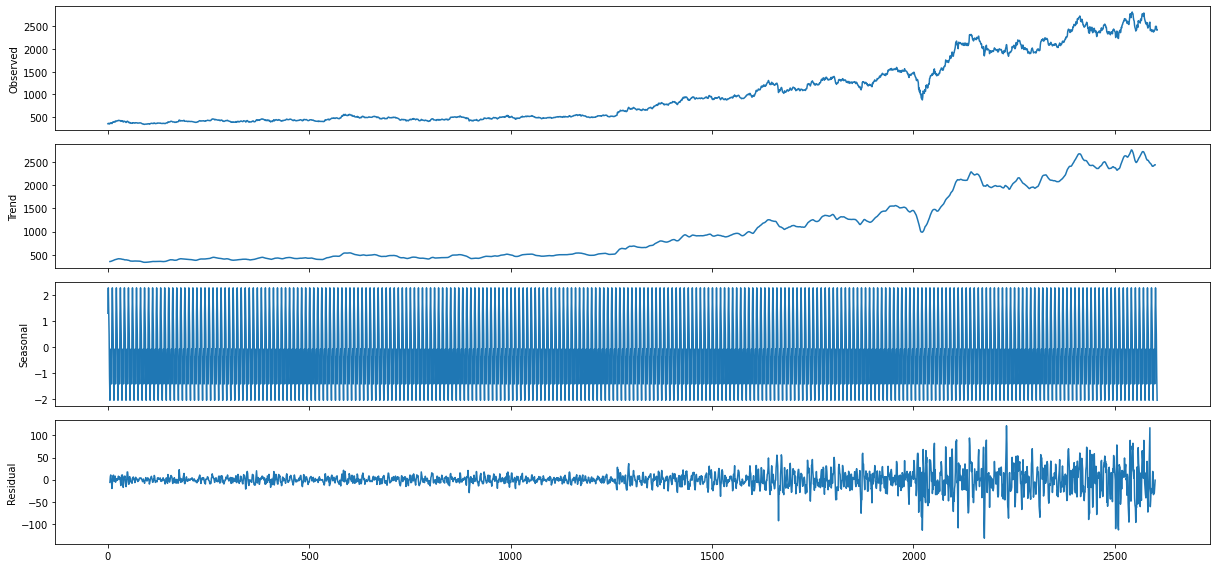

In [287]:
rcParams['figure.figsize'] = 17,8
decomposition =seasonal_decompose(series.Close,freq=10)
fig = decomposition.plot()
plt.show()

# Visualization

In [288]:
fig = px.line(x=series.Date,y=series.Close,labels={"x":"Date","y":"Closing price"})
fig.show()

In [289]:
fig = px.box(x=series.Date,y=series.Close,labels={"x":"Year","y":"Closing price"})
fig.show()

In [290]:
fig=px.bar(series,x=series.Date,y="Close")
fig.show()

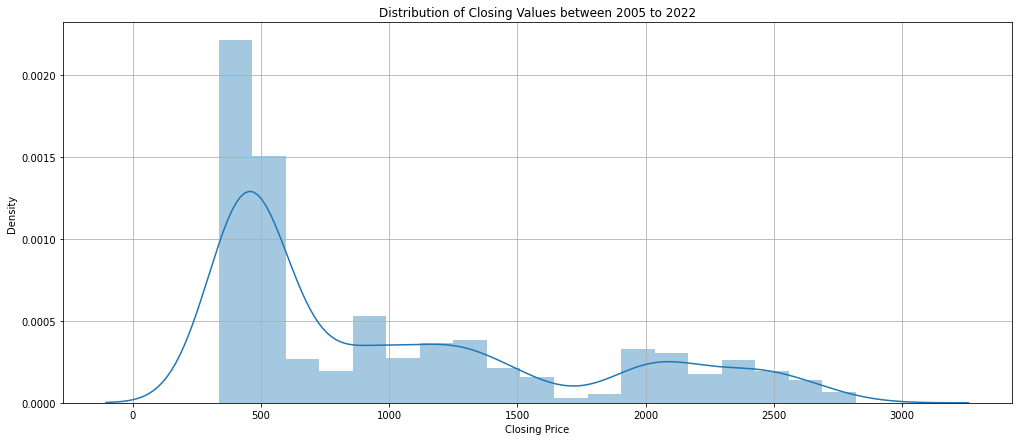

In [291]:
plt.figure(figsize=(17,7))
sns.distplot(series.Close)
plt.title("Distribution of Closing Values between 2005 to 2022")
plt.xlabel("Closing Price")
plt.grid(True)
plt.show()

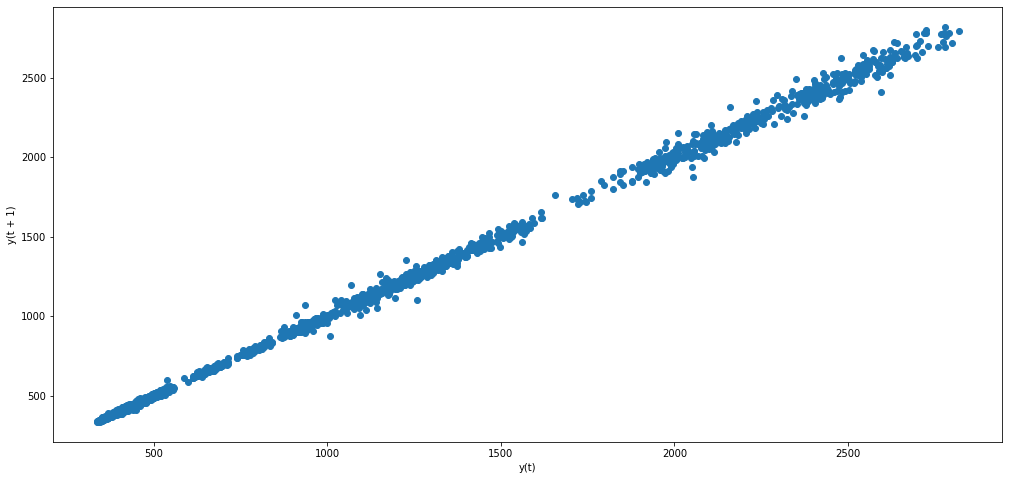

In [292]:
lag_plot(series.Close)

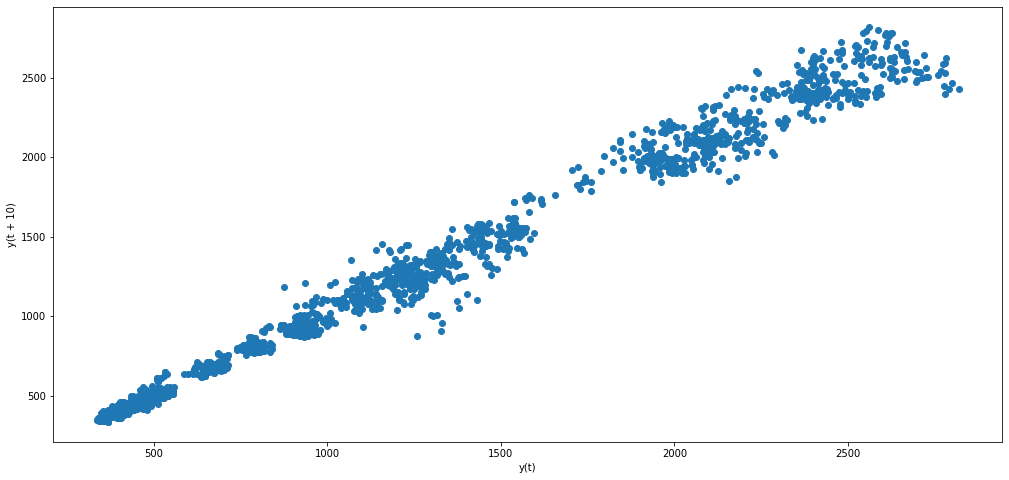

In [293]:
lag_plot(series.Close,lag=10)

# Data Preprocessing

In [294]:
series.shape

(2606, 2)

In [295]:
series

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2601,2022-07-20,2503.000000
2602,2022-07-21,2486.300049
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902


In [296]:
(20/100)*len(series),(80/100)*len(series)

(521.2, 2084.8)

In [297]:
y=np.round((20/100)*len(series),0)
y=int(y)
y

521

In [298]:
x=np.round((80/100)*len(series),0)
x=int(x)
x

2085

In [299]:
train=series.head(x)
test=series.tail(y)
train.shape,test.shape

((2085, 2), (521, 2))

In [300]:
train.head()

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097


In [301]:
test.head()

,Date,Close
2085,2020-06-26,1741.650024
2086,2020-06-29,1723.150024
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976


### Defining Error Functions

In [302]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)**2))
    return temp
def MAPE(pred,actual):
    temp=np.mean(np.abs((pred-actual)/actual)*100)
    return temp

* Creating moving averages

In [303]:
moving_avg_20=series.Close.rolling(20).mean()     # mean of first 20 values and put it in 21 th observation and so on..
moving_avg_20[20]

374.17321319580077

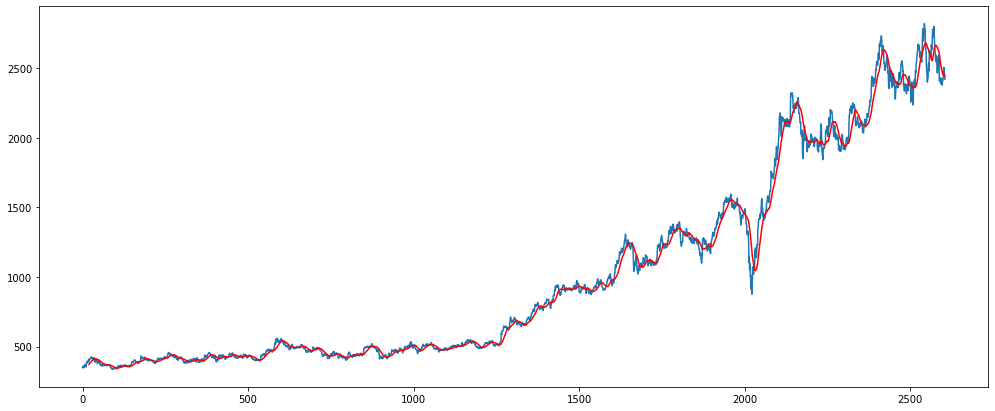

In [304]:
plt.figure(figsize=(17,7))
plt.plot(series.Close)
plt.plot(moving_avg_20,color="red")
plt.show()

In [305]:
train.shape,test.shape

((2085, 2), (521, 2))

In [306]:
train

,Date,Close
0,2012-01-02,349.957764
1,2012-01-03,358.922760
2,2012-01-04,354.712677
3,2012-01-05,346.465851
4,2012-01-06,355.406097
...,...,...
2080,2020-06-19,1759.400024
2081,2020-06-22,1746.150024
2082,2020-06-23,1720.900024
2083,2020-06-24,1727.849976


In [307]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(series[["Close"]].values)
scaled_train=scaler.fit_transform(train[["Close"]].values)
scaled_test=scaler.fit_transform(test[["Close"]].values)
scaled_train

array([[0.01058744],
       [0.01688076],
       [0.01392533],
       ...,
       [0.97297343],
       [0.97785222],
       [0.97086747]])

In [308]:
len(scaled_train),len(scaled_test),len(scaled_data),scaled_data.shape

(2085, 521, 2606, (2606, 1))

In [309]:
x_train=[]
y_train=[]

for i in range(20,len(scaled_train)):
  x_train.append(scaled_train[i-20:i])
  y_train.append(scaled_train[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [310]:
x_train

array([[[0.01058744],
        [0.01688076],
        [0.01392533],
        ...,
        [0.03993319],
        [0.05017291],
        [0.04125443]],

       [[0.01688076],
        [0.01392533],
        [0.00813615],
        ...,
        [0.05017291],
        [0.04125443],
        [0.0490255 ]],

       [[0.01392533],
        [0.00813615],
        [0.01441211],
        ...,
        [0.04125443],
        [0.0490255 ],
        [0.05392804]],

       ...,

       [[0.7645881 ],
        [0.77968086],
        [0.79842392],
        ...,
        [0.92734417],
        [1.        ],
        [0.99069865]],

       [[0.77968086],
        [0.79842392],
        [0.79291333],
        ...,
        [1.        ],
        [0.99069865],
        [0.97297343]],

       [[0.79842392],
        [0.79291333],
        [0.83218956],
        ...,
        [0.99069865],
        [0.97297343],
        [0.97785222]]])

In [311]:
x_train.shape ,len(x_train)  # 1474= Rows , 20=columns because first 20 values have become columns for prediction of y_train. 1 is for univariate that is Close 

((2065, 20, 1), 2065)

## Model Building

In [312]:
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [313]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))  #x_train.shape[1]=20, 1 is for Close column
model.add(Dropout(0.1))
model.add(LSTM(units=60,activation="relu",return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation="relu",return_sequences=True))  
model.add(Dropout(0.3))
model.add(LSTM(units=120,activation="relu"))  
model.add(Dropout(0.4))
model.add(Dense(units=1))

In [314]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 20, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 20, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 20, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 20, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [315]:
model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
65/65 [==============================] - 10s 87ms/step - loss: 0.0275
Epoch 2/100
65/65 [==============================] - 7s 103ms/step - loss: 0.0044
Epoch 3/100
65/65 [==============================] - 8s 115ms/step - loss: 0.0045
Epoch 4/100
65/65 [==============================] - 7s 111ms/step - loss: 0.0040
Epoch 5/100
65/65 [==============================] - 6s 98ms/step - loss: 0.0038
Epoch 6/100
65/65 [==============================] - 5s 74ms/step - loss: 0.0036
Epoch 7/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0035
Epoch 8/100
65/65 [==============================] - 4s 54ms/step - loss: 0.0041
Epoch 9/100
65/65 [==============================] - 3s 53ms/step - loss: 0.0037
Epoch 10/100
65/65 [==============================] - 4s 55ms/step - loss: 0.0034
Epoch 11/100
65/65 [==============================] - 4s 56ms/step - loss: 0.0039
Epoch 12/100
65/65 [==============================] - 4s 54ms/step - loss: 0.0028
Epoch 13/100
65/65 [=

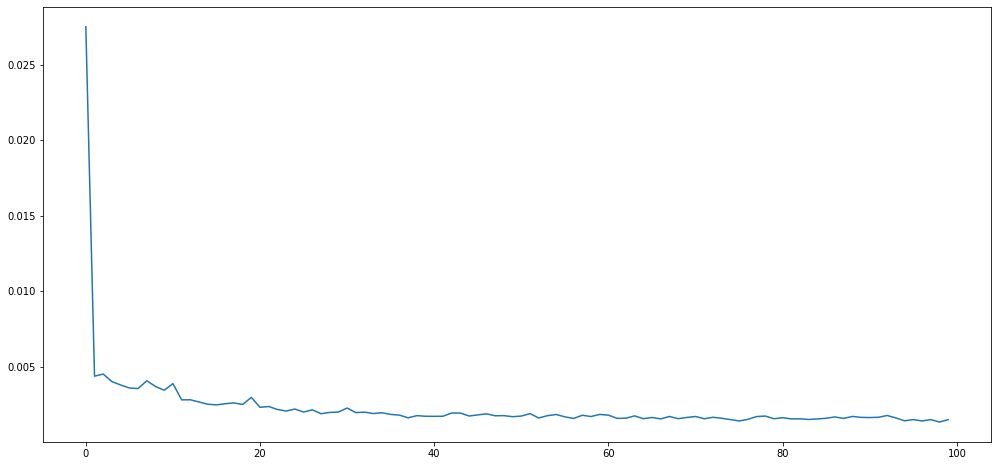

In [316]:
loss=model.history.history["loss"]
plt.plot(loss)
plt.show()

In [317]:
#model.save("LSTM_model")

### Testing

In [318]:
test.head()

,Date,Close
2085,2020-06-26,1741.650024
2086,2020-06-29,1723.150024
2087,2020-06-30,1704.099976
2088,2020-07-01,1737.599976
2089,2020-07-02,1760.349976


Here for the prediction of test dataset, we need previous 50 data points so that out y will be the first value of test dataset. and that previous values are the last values of training dataset. So we have to fetch that last training values.and append it on test dataset.

In [319]:
train.tail(20)

,Date,Close
2065,2020-05-29,1464.400024
2066,2020-06-01,1520.349976
2067,2020-06-02,1535.699951
2068,2020-06-03,1541.650024
2069,2020-06-04,1579.800049
2070,2020-06-05,1581.699951
2071,2020-06-08,1569.500000
2072,2020-06-09,1537.150024
2073,2020-06-10,1572.150024
2074,2020-06-11,1537.699951


In [320]:
past_20_train_values=train[["Close"]].tail(20)

In [321]:
final_df=past_20_train_values.append(test,ignore_index=True)
final_df

,Close,Date
0,1464.400024,NaT
1,1520.349976,NaT
2,1535.699951,NaT
3,1541.650024,NaT
4,1579.800049,NaT
...,...,...
536,2503.000000,2022-07-20
537,2486.300049,2022-07-21
538,2503.100098,2022-07-22
539,2420.399902,2022-07-25


In [322]:
test.shape

(521, 2)

In [323]:
scaled_final_test_data=scaler.fit_transform(final_df[["Close"]])
scaled_final_test_data

array([[0.        ],
       [0.04127777],
       [0.0526024 ],
       [0.05699214],
       [0.08513779],
       [0.08653947],
       [0.0775388 ],
       [0.05367221],
       [0.07949389],
       [0.05407792],
       [0.09177765],
       [0.11077503],
       [0.11309891],
       [0.11136519],
       [0.14128149],
       [0.21763989],
       [0.20786454],
       [0.18923604],
       [0.19436345],
       [0.18702275],
       [0.20454461],
       [0.190896  ],
       [0.17684159],
       [0.20155663],
       [0.21834072],
       [0.23866611],
       [0.28580914],
       [0.26489351],
       [0.24611749],
       [0.26548376],
       [0.3051754 ],
       [0.34719093],
       [0.33391121],
       [0.28005456],
       [0.27961192],
       [0.33000103],
       [0.33605074],
       [0.37415618],
       [0.39809653],
       [0.43778818],
       [0.50296938],
       [0.51038392],
       [0.52624581],
       [0.46645014],
       [0.47545099],
       [0.44464941],
       [0.40178535],
       [0.506

In [324]:
len(scaled_final_test_data),scaled_final_test_data.shape

(541, (541, 1))

In [325]:
x_test=[]
y_test=[]

for i in range(20,len(scaled_final_test_data)):
  x_test.append(scaled_final_test_data[i-20:i])
  y_test.append(scaled_final_test_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [326]:
x_test.shape,y_test.shape

((521, 20, 1), (521,))

## Predictions

In [327]:
y_pred_test=model.predict(x_test)
y_pred_test

array([[0.19450769],
       [0.20843545],
       [0.21927501],
       [0.22715864],
       [0.23198666],
       [0.23530595],
       [0.23743062],
       [0.23903151],
       [0.24050565],
       [0.24217235],
       [0.24365194],
       [0.24611008],
       [0.25032339],
       [0.25660563],
       [0.26387691],
       [0.27161258],
       [0.27959844],
       [0.28738868],
       [0.2952126 ],
       [0.30423418],
       [0.3192404 ],
       [0.34736478],
       [0.38742948],
       [0.4311967 ],
       [0.4577161 ],
       [0.467946  ],
       [0.46632177],
       [0.45736164],
       [0.44735235],
       [0.44225937],
       [0.44506162],
       [0.4545515 ],
       [0.4634598 ],
       [0.4700215 ],
       [0.47320765],
       [0.47305793],
       [0.4701082 ],
       [0.46441483],
       [0.45878512],
       [0.45633757],
       [0.45475754],
       [0.45180044],
       [0.44831377],
       [0.44451118],
       [0.4447062 ],
       [0.44762355],
       [0.45172602],
       [0.452

In [328]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=["y_pred_test"])
y_pred_test_df

,y_pred_test
0,0.194508
1,0.208435
2,0.219275
3,0.227159
4,0.231987
...,...
516,0.692328
517,0.708445
518,0.725568
519,0.740677


In [329]:
original_y_pred_test=scaler.inverse_transform(y_pred_test_df)
original_y_pred_test

array([[1728.0454],
       [1746.924 ],
       [1761.6163],
       [1772.3022],
       [1778.8463],
       [1783.3456],
       [1786.2255],
       [1788.3953],
       [1790.3934],
       [1792.6525],
       [1794.6581],
       [1797.9899],
       [1803.7008],
       [1812.2161],
       [1822.0719],
       [1832.5574],
       [1843.3817],
       [1853.941 ],
       [1864.5459],
       [1876.7743],
       [1897.1145],
       [1935.2356],
       [1989.5413],
       [2048.8655],
       [2084.8113],
       [2098.6775],
       [2096.4758],
       [2084.3308],
       [2070.764 ],
       [2063.8606],
       [2067.659 ],
       [2080.522 ],
       [2092.5967],
       [2101.4907],
       [2105.8093],
       [2105.6064],
       [2101.6082],
       [2093.891 ],
       [2086.2603],
       [2082.9429],
       [2080.8013],
       [2076.793 ],
       [2072.067 ],
       [2066.9126],
       [2067.177 ],
       [2071.1313],
       [2076.6921],
       [2078.1226],
       [2075.3496],
       [2074.0898],


In [330]:
y_pred_test.shape

(521, 1)

In [331]:
y_test

array([0.20454461, 0.190896  , 0.17684159, 0.20155663, 0.21834072,
       0.23866611, 0.28580914, 0.26489351, 0.24611749, 0.26548376,
       0.3051754 , 0.34719093, 0.33391121, 0.28005456, 0.27961192,
       0.33000103, 0.33605074, 0.37415618, 0.39809653, 0.43778818,
       0.50296938, 0.51038392, 0.52624581, 0.46645014, 0.47545099,
       0.44464941, 0.40178535, 0.50625256, 0.48843549, 0.49407948,
       0.50319074, 0.48356637, 0.49385812, 0.48928403, 0.48518941,
       0.47910287, 0.46254014, 0.48260724, 0.49219815, 0.46674535,
       0.4555314 , 0.46578623, 0.45571584, 0.49644029, 0.47674207,
       0.48083651, 0.45468287, 0.45951525, 0.48972658, 0.47784871,
       0.45213762, 0.45612147, 0.4741599 , 0.51418351, 0.62680285,
       0.63104499, 0.61835551, 0.63038107, 0.63458628, 0.61555198,
       0.62067939, 0.58390205, 0.55092393, 0.56542107, 0.52882798,
       0.54395211, 0.55468659, 0.57593418, 0.56804016, 0.56132645,
       0.55169861, 0.55033386, 0.58511928, 0.57165512, 0.56737

In [332]:
original_y_test_df=pd.DataFrame(y_test,columns=["y_test"])
original_y_test_df

,y_test
0,0.204545
1,0.190896
2,0.176842
3,0.201557
4,0.218341
...,...
516,0.766240
517,0.753919
518,0.766314
519,0.705301


In [333]:
original_y_test=scaler.inverse_transform(original_y_test_df)
original_y_test

array([[1741.65002441],
       [1723.15002441],
       [1704.09997559],
       [1737.59997559],
       [1760.34997559],
       [1787.90002441],
       [1851.80004883],
       [1823.44995117],
       [1798.        ],
       [1824.25      ],
       [1878.05004883],
       [1935.        ],
       [1917.        ],
       [1844.        ],
       [1843.40002441],
       [1911.69995117],
       [1919.90002441],
       [1971.55004883],
       [2004.        ],
       [2057.80004883],
       [2146.14990234],
       [2156.19995117],
       [2177.69995117],
       [2096.64990234],
       [2108.85009766],
       [2067.10009766],
       [2009.        ],
       [2150.60009766],
       [2126.44995117],
       [2134.10009766],
       [2146.44995117],
       [2119.85009766],
       [2133.80004883],
       [2127.60009766],
       [2122.05004883],
       [2113.80004883],
       [2091.35009766],
       [2118.55004883],
       [2131.55004883],
       [2097.05004883],
       [2081.85009766],
       [2095.75 

Scaling up

In [334]:
#scaler.scale_

In [335]:
#1/scaler.scale_

In [336]:
#scale_factor=1/scaler.scale_
#y_pred_test=y_pred_test*scale_factor
#y_test=y_test*scale_factor

In [337]:
#y_pred_test

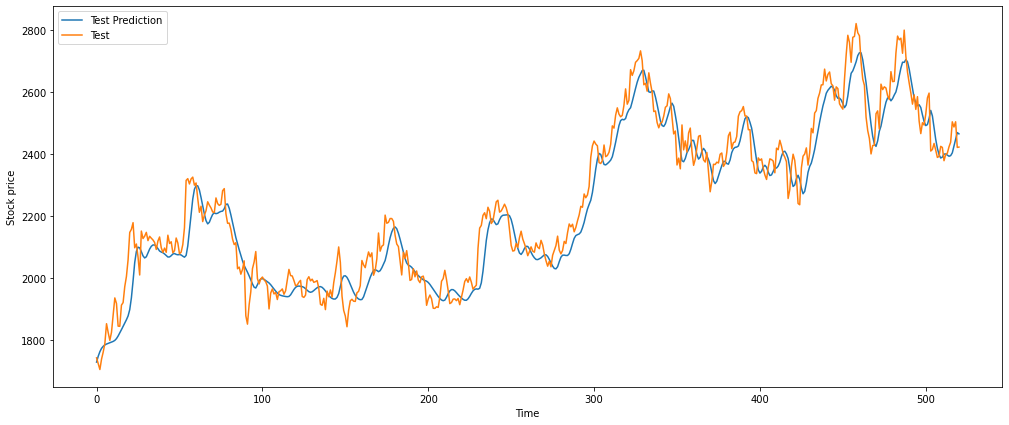

In [338]:
plt.figure(figsize=(17,7))
plt.plot(original_y_pred_test,label="Test Prediction")
plt.plot(original_y_test,label="Test")
plt.xlabel("Time")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [339]:
test.shape

(521, 2)

In [340]:
y_pred_test_df=pd.DataFrame(original_y_pred_test,columns=["Test_Predictions"],index=test.index)
y_pred_test_df

,Test_Predictions
2085,1728.045410
2086,1746.923950
2087,1761.616333
2088,1772.302246
2089,1778.846313
...,...
2601,2402.815430
2602,2424.661133
2603,2447.870850
2604,2468.350586


In [341]:
test_df=pd.DataFrame(original_y_test,columns=["Test_values"],index=test.index)
test_df

,Test_values
2085,1741.650024
2086,1723.150024
2087,1704.099976
2088,1737.599976
2089,1760.349976
...,...
2601,2503.000000
2602,2486.300049
2603,2503.100098
2604,2420.399902


In [342]:
final_test_df=test_df.join(y_pred_test_df)
final_test_df

,Test_values,Test_Predictions
2085,1741.650024,1728.045410
2086,1723.150024,1746.923950
2087,1704.099976,1761.616333
2088,1737.599976,1772.302246
2089,1760.349976,1778.846313
...,...,...
2601,2503.000000,2402.815430
2602,2486.300049,2424.661133
2603,2503.100098,2447.870850
2604,2420.399902,2468.350586


In [343]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 2085 to 2605
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Test_values       521 non-null    float64
 1   Test_Predictions  521 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 6.2 KB


In [344]:
fig=px.line(final_test_df,x=final_test_df.index,y=final_test_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [345]:
RMSE=RMSE(final_test_df.Test_values,final_test_df.Test_Predictions)
RMSE

67.39328059724792

In [346]:
MAPE=MAPE (final_test_df.Test_values,final_test_df.Test_Predictions)
MAPE

2.395299322498665

## Appying model on whole dataset

In [347]:
scaled_data

array([[0.0060693 ],
       [0.00967698],
       [0.00798277],
       ...,
       [0.8725339 ],
       [0.8392538 ],
       [0.8396965 ]])

In [348]:
X=[]
Y=[]

for i in range(20,len(scaled_data)):
  X.append(scaled_data[i-20:i])
  Y.append(scaled_data[i,0])

X,Y=np.array(X),np.array(Y)

In [349]:
X.shape,Y.shape,scaled_data.shape

((2586, 20, 1), (2586,), (2606, 1))

In [350]:
1869-20

1849

In [351]:
X

array([[[0.0060693 ],
        [0.00967698],
        [0.00798277],
        ...,
        [0.02289191],
        [0.02876188],
        [0.02364932]],

       [[0.00967698],
        [0.00798277],
        [0.00466409],
        ...,
        [0.02876188],
        [0.02364932],
        [0.02810412]],

       [[0.00798277],
        [0.00466409],
        [0.00826181],
        ...,
        [0.02364932],
        [0.02810412],
        [0.03091453]],

       ...,

       [[0.8713065 ],
        [0.86832854],
        [0.88243334],
        ...,
        [0.84597427],
        [0.87249362],
        [0.86577325]],

       [[0.86832854],
        [0.88243334],
        [0.90354018],
        ...,
        [0.87249362],
        [0.86577325],
        [0.8725339 ]],

       [[0.88243334],
        [0.90354018],
        [0.90977766],
        ...,
        [0.86577325],
        [0.8725339 ],
        [0.8392538 ]]])

In [352]:
y_pred=model.predict(X)
y_pred

array([[0.06793882],
       [0.06895308],
       [0.069876  ],
       ...,
       [0.84392154],
       [0.8499483 ],
       [0.8450745 ]], dtype=float32)

In [353]:
y_pred.shape

(2586, 1)

In [354]:
Y

array([0.02810412, 0.03091453, 0.03052585, ..., 0.8725339 , 0.8392538 ,
       0.8396965 ])

In [355]:
y_df=pd.DataFrame(Y,columns=["Close"])
y_df.head(2)

,Close
0,0.028104
1,0.030915


In [356]:
Actual_y=scaler.inverse_transform(y_df)
Actual_y

array([[1502.4937527 ],
       [1506.3031222 ],
       [1505.77629078],
       ...,
       [2647.07616025],
       [2601.96664686],
       [2602.56670433]])

In [357]:
y_pred

array([[0.06793882],
       [0.06895308],
       [0.069876  ],
       ...,
       [0.84392154],
       [0.8499483 ],
       [0.8450745 ]], dtype=float32)

In [358]:
y_pred_df=pd.DataFrame(y_pred,columns=["Predicted_y"])
y_pred_df

,Predicted_y
0,0.067939
1,0.068953
2,0.069876
3,0.070923
4,0.072051
...,...
2581,0.825053
2582,0.835277
2583,0.843922
2584,0.849948


In [359]:
predicted_y=scaler.inverse_transform(y_pred_df)
predicted_y

array([[1556.4877],
       [1557.8625],
       [1559.1135],
       ...,
       [2608.2935],
       [2616.4624],
       [2609.8562]], dtype=float32)

In [360]:
s=series[20:]
s

,Date,Close
20,2012-01-31,404.713715
21,2012-02-01,411.697510
22,2012-02-02,410.731659
23,2012-02-03,415.214172
24,2012-02-06,412.589081
...,...,...
2601,2022-07-20,2503.000000
2602,2022-07-21,2486.300049
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902


In [361]:
y_pred_df=pd.DataFrame(predicted_y,columns=["Predictions"])
y_pred_df

,Predictions
0,1556.487671
1,1557.862549
2,1559.113525
3,1560.531982
4,1562.061279
...,...
2581,2582.718506
2582,2596.575928
2583,2608.293457
2584,2616.462402


In [362]:
Y_df=pd.DataFrame(Actual_y,columns=["Actual"])
Y_df

,Actual
0,1502.493753
1,1506.303122
2,1505.776291
3,1508.221315
4,1506.789437
...,...
2581,2647.021561
2582,2637.912433
2583,2647.076160
2584,2601.966647


In [363]:
final_prediction_df=Y_df.join(y_pred_df)
final_prediction_df

,Actual,Predictions
0,1502.493753,1556.487671
1,1506.303122,1557.862549
2,1505.776291,1559.113525
3,1508.221315,1560.531982
4,1506.789437,1562.061279
...,...,...
2581,2647.021561,2582.718506
2582,2637.912433,2596.575928
2583,2647.076160,2608.293457
2584,2601.966647,2616.462402


In [364]:
fig=px.line(final_prediction_df,x=final_prediction_df.index,y=final_prediction_df.columns[0:2],labels={"Price":"Numbers"})
fig.show()

In [365]:
#RMSE1=RMSE(final_prediction_df.Actual,final_prediction_df.Predictions)
#RMSE1

In [366]:
#MAPE=MAPE(final_prediction_df.Predictions,final_prediction_df.Actual)
#MAPE

## Prediction of new data points

In [367]:
#get the quote
data=yf.download(tickers,start="2015-01-01")
data
#create new dataframe
new_df = data.filter(['Close'])
#get the last 100 days close price value and covert the data frame into array
last_20_days = new_df[-20:].values
#scale the values between 0 to 1
last_20_days_scaled = scaler.transform(last_20_days)
#create empty list
x_test = []
#append the past 100 days 
x_test.append(last_20_days_scaled)
#convert the x test data into numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[2446.033]]


In [368]:
type(pred_price)

numpy.ndarray

In [369]:
data1=yf.download(tickers,start="2022-07-26")
data1

print(data1['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-07-26    2421.5
Name: Close, dtype: float64


In [370]:
last_20_days = new_df[-20:].values
last_20_days

array([[2580.14990234],
       [2595.64990234],
       [2408.69995117],
       [2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ]])

In [371]:
new_predictions=new_df.tail(20).values  #dates= 29-06-2022  - 26-07-2022
new_predictions

array([[2580.14990234],
       [2595.64990234],
       [2408.69995117],
       [2413.69995117],
       [2433.25      ],
       [2411.85009766],
       [2388.10009766],
       [2391.39990234],
       [2423.89990234],
       [2420.44995117],
       [2377.55004883],
       [2397.14990234],
       [2401.80004883],
       [2422.25      ],
       [2437.10009766],
       [2503.        ],
       [2486.30004883],
       [2503.10009766],
       [2420.39990234],
       [2421.5       ]])

In [372]:
new_predictions=np.array(new_predictions)

In [373]:
type(new_predictions)

numpy.ndarray

In [374]:
new_pred_df=pd.DataFrame(new_predictions,columns=["new_Predictions"])
new_pred_df

,new_Predictions
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [375]:
new_val=pred_price.tolist()
new_val

[[2446.032958984375]]

In [376]:
type(new_val)

list

In [377]:
#new_pewdictions.extend(pred_price)
new_arr = np.append(new_predictions, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898])

In [378]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])

In [379]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2430.124]]


In [380]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344])

In [381]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [382]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2419.5544]]


In [383]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344, 2419.55444336])

In [384]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [385]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2412.4795]]


In [386]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344, 2419.55444336, 2412.47949219])

In [387]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [388]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2407.0088]]


In [389]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344, 2419.55444336, 2412.47949219,
       2407.00878906])

In [390]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [391]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2402.1873]]


In [392]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344, 2419.55444336, 2412.47949219,
       2407.00878906, 2402.18725586])

In [393]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [394]:
last_20_days = new_arr_df[-20:].values
last_20_days_scaled = scaler.transform(last_20_days)
x_test = []
x_test.append(last_20_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2397.546]]


In [395]:
new_arr = np.append(new_arr, pred_price)
new_arr

array([2580.14990234, 2595.64990234, 2408.69995117, 2413.69995117,
       2433.25      , 2411.85009766, 2388.10009766, 2391.39990234,
       2423.89990234, 2420.44995117, 2377.55004883, 2397.14990234,
       2401.80004883, 2422.25      , 2437.10009766, 2503.        ,
       2486.30004883, 2503.10009766, 2420.39990234, 2421.5       ,
       2446.03295898, 2430.12402344, 2419.55444336, 2412.47949219,
       2407.00878906, 2402.18725586, 2397.54589844])

In [396]:
new_arr_df=pd.DataFrame(new_arr,columns=["Pred"])
new_arr_df

,Pred
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [423]:
df2=new_df.tail(20)
df2

,Close
Date,
2022-06-29,2580.149902
2022-06-30,2595.649902
2022-07-01,2408.699951
2022-07-04,2413.699951
2022-07-05,2433.250000
2022-07-06,2411.850098
2022-07-07,2388.100098
2022-07-08,2391.399902
2022-07-11,2423.899902


In [424]:
df2=pd.DataFrame(df2.values,columns=["Actual"])
df2

,Actual
0,2580.149902
1,2595.649902
2,2408.699951
3,2413.699951
4,2433.250000
5,2411.850098
6,2388.100098
7,2391.399902
8,2423.899902
9,2420.449951


In [426]:
future_pred=new_arr_df[20:]
future_pred

,Pred
20,2446.032959
21,2430.124023
22,2419.554443
23,2412.479492
24,2407.008789
25,2402.187256
26,2397.545898


In [415]:
series.tail()

,Date,Close
2601,2022-07-20,2503.000000
2602,2022-07-21,2486.300049
2603,2022-07-22,2503.100098
2604,2022-07-25,2420.399902
2605,2022-07-26,2421.500000


In [433]:
np.arange((len(series)),(len(series)+7))

array([2606, 2607, 2608, 2609, 2610, 2611, 2612])

In [435]:
series_future_df=future_pred.set_index(np.arange((len(series)),(len(series)+7)))
series_future_df

,Pred
2606,2446.032959
2607,2430.124023
2608,2419.554443
2609,2412.479492
2610,2407.008789
2611,2402.187256
2612,2397.545898


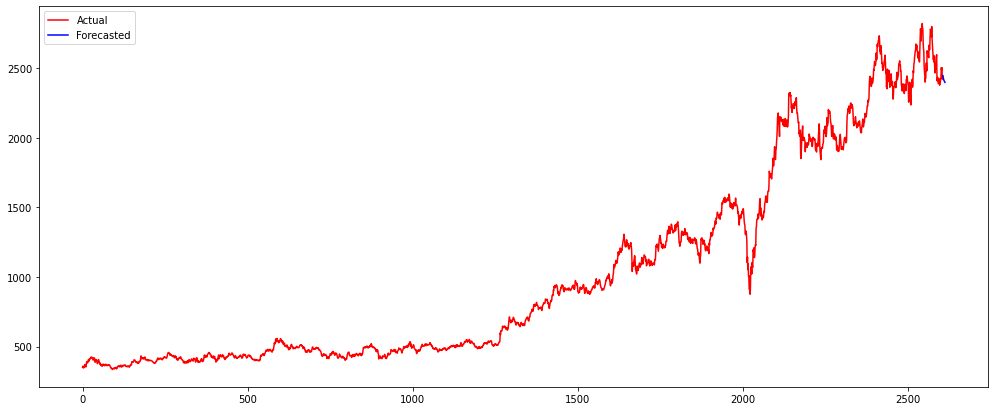

In [436]:
plt.figure(figsize=(17,7))
plt.plot(series.Close,label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()

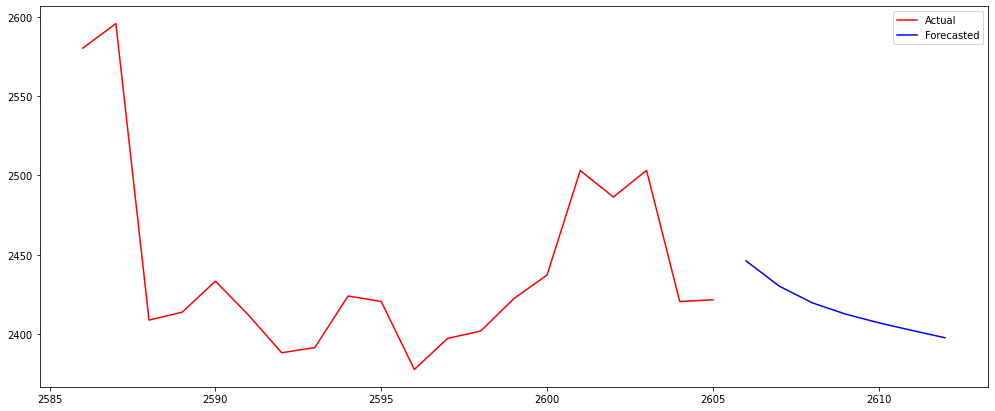

In [437]:
plt.figure(figsize=(17,7))
plt.plot(series[["Close"]].tail(20),label="Actual",color="red")
plt.plot(series_future_df,label="Forecasted",color="blue")
plt.legend()
plt.show()

In [403]:
import pickle

In [404]:
filename="LSTM_trained_model.sav"
pickle.dump(model,open(filename,"wb"))

INFO:tensorflow:Assets written to: ram://688183c3-71d8-40c2-91fb-7faadd08959e/assets


INFO:tensorflow:Assets written to: ram://688183c3-71d8-40c2-91fb-7faadd08959e/assets


In [405]:
# Loading the saved model

leaded_model=pickle.load(open("LSTM_trained_model.sav","rb"))

In [406]:
data=yf.download(tickers,start="2015-01-01")
data
#create new dataframe
new_df = data.filter(['Close'])
#get the last 100 days close price value and covert the data frame into array
last_20_days = new_df[-20:].values
#scale the values between 0 to 1
last_20_days_scaled = scaler.transform(last_20_days)
#create empty list
x_test = []
#append the past 100 days 
x_test.append(last_20_days_scaled)
#convert the x test data into numpy array
x_test = np.array(x_test)
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
#get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[2446.033]]
